In [2]:
from src import esma

In [3]:
def init_model():
    model = esma.project(project_id='MnTe_r2can')
    # model.set_pseudo(path="/scratch/s.sevim/espresso-machine/Pseudopotentials/PBE/US")
    model.set_pseudo(path="/scratch/s.sevim/espresso-machine/Pseudopotentials/PBE/NC/SOC/")
    model.get_structure(format="poscar",path="/scratch/s.sevim/espresso-machine/Structures/MnTe.poscar")
    model.set_cores(64)
    model.ecutwfc(100) #Set wavefunction cutoff
    model.ecutrho(1000) #Set wavefunction cutoff
    model.k_points([8,8,5]) #Set number of k points
    model.degauss(0.01) #Set degauss value
    model.conv_thr(1e-6) #Set convergence threshold
    model.smearing('mv')
    model.mixing_beta(0.2)
    model.electron_maxstep(500) #Max number of electron iteration
    model.exchange_maxstep(500) #Max number of exchange iteration
    return model

In [8]:
model = init_model()
# model.config['pw']['system']["input_dft"] = "XC-000I-000I-101L-130L-000I-000I"
model.config['pw']['system']["input_dft"] = "r2scan"
model.config['metadata']['binary_path']="/work/bansil/s.sevim/software/qe-scan/q-e/bin"

In [9]:
afm = model.magnetize(magnetic_atom='Mn',angle1=90,angle2=30)[1]

In [10]:
afm.soc()

In [11]:
afm.calculate('scf')

scf for afm1 is started
scf for afm1 is finished


In [ ]:
points = [
            ['GAMMA',0,0,0],
            ['M',0.5,0,0],
            ["M'",0.5,0,0.35],
            ["GAMMA'",0,0,0.35],
            ["K",0.33333,0.3333,0]
            ]

In [ ]:
path = ['K','GAMMA','K'] #choose corners
afm.band_points(path,number=40,points=points) #define path
afm.calculate('bands',pp_core=32)

bands for afm1 is started
bands for afm1 is finished
bands-pp for afm1 is started
bands-pp for afm1 is finished


In [ ]:
#Step 6 - Plotting
afm.plot('electron',ylim=[9,12],save=True,figsize=(4,6)) #plot electron bands

FileNotFoundError: ./Projects/MnTe_r2can/afm1/bands.dat.gnu not found.

<Figure size 400x600 with 0 Axes>

In [28]:
model.calculate('scf')

scf for results is started
scf for results is finished


In [29]:
#Step 4 - Bands calculation
path = ['L','GAMMA','X','K','GAMMA'] #define corners
num_points = 100 #number of points
model.band_points(path,num_points) #define path
model.calculate('bands')

bands for results is started
bands for results is finished
bands-pp for results is started
bands-pp for results is finished


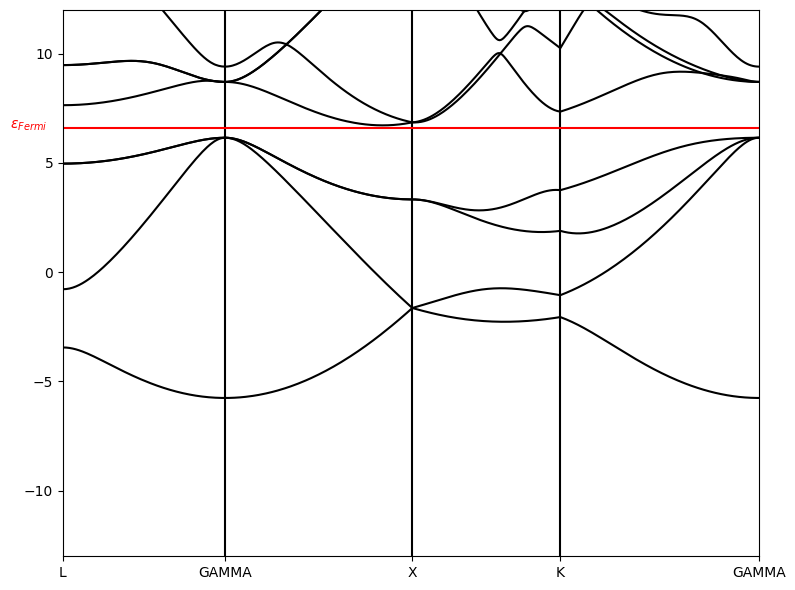

In [30]:
#Step 5 - Plotting
model.plot('electron',ylim=[-13,12]) #plot electron bands